# Проект по SQL

# Описание проекта

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

# Описание данных

[**Таблица books**](#section_id)

Содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

[**Таблица authors**](#section1_id)

Содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

[**Таблица publishers**](#section2_id)

Содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

[**Таблица ratings**](#section3_id)

Содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

[**Таблица reviews**](#section4_id)

Содержит данные о пользовательских обзорах:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора.

# Схема данных

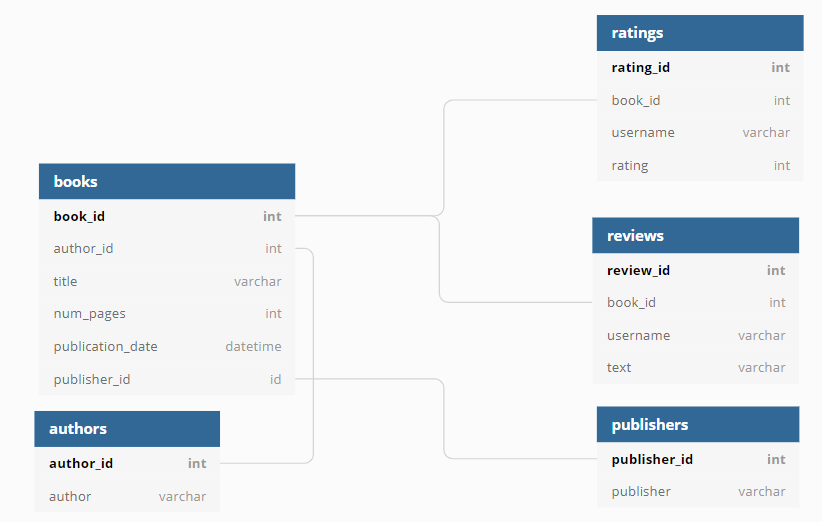

# Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Доступ к базе данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
# создадим функцию, чтобы выполнять SQL-запросы
def project(query):
    return pd.io.sql.read_sql(query, con = engine)

# Исследуем таблицы — выведем первые строки

## Таблица books
<a id='section_id'></a>

In [3]:
# выведем первые строки таблицы books
query = '''
           SELECT *
           FROM books
           LIMIT 5
           
        '''
project(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


## Таблица authors
<a id='section1_id'></a>

In [4]:
# выведем первые строки таблицы authors
query = '''
           SELECT *
           FROM authors
           LIMIT 5
           
        '''
project(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


## Таблица publishers
<a id='section2_id'></a>

In [5]:
# выведем первые строки таблицы publishers
query = '''
           SELECT *
           FROM publishers
           LIMIT 5
           
        '''
project(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


## Таблица ratings
<a id='section3_id'></a>

In [6]:
# выведем первые строки таблицы ratings
query = '''
           SELECT *
           FROM ratings
           LIMIT 5
           
        '''
project(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


## Таблица reviews
<a id='section4_id'></a>

In [7]:
# выведем первые строки таблицы reviews
query = '''
           SELECT *
           FROM reviews
           LIMIT 5
           
        '''
project(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


# Выполнение заданий

# Задание №1

Посчитать, сколько книг вышло после 1 января 2000 года.

In [8]:
query = '''
           SELECT count(book_id)
           FROM books
           WHERE publication_date > '2000-01-01' 
           
        '''
project(query)

,count
0,819


<font color='green'>**Вывод:**</font>

После 1 января 2000 года вышло 819 книг.

# Задание №2

Для каждой книги посчитайть количество обзоров и среднюю оценку.

In [9]:
query = '''
           SELECT b.book_id,
                  b.title,
                  count(DISTINCT re.review_id) as count_re, 
                  avg(ra.rating) as avg_ra       
           FROM books as b
           LEFT JOIN reviews as re ON b.book_id = re.book_id
           LEFT JOIN ratings as ra ON b.book_id = ra.book_id
           GROUP BY b.book_id
           ORDER BY avg_ra DESC, count_re DESC
           LIMIT 10;
             
        '''
project(query)

,book_id,title,count_re,avg_ra
0,17,A Dirty Job (Grim Reaper #1),4,5.0
1,553,School's Out—Forever (Maximum Ride #2),3,5.0
2,444,Moneyball: The Art of Winning an Unfair Game,3,5.0
3,169,Crucial Conversations: Tools for Talking When ...,2,5.0
4,136,Captivating: Unveiling the Mystery of a Woman'...,2,5.0
5,62,Alas Babylon,2,5.0
6,57,Act of Treason (Mitch Rapp #9),2,5.0
7,20,A Fistful of Charms (The Hollows #4),2,5.0
8,55,A Woman of Substance (Emma Harte Saga #1),2,5.0
9,76,Angels Fall,2,5.0


<font color='green'>**Вывод:**</font>

Книга **A Dirty Job (Grim Reaper #1)** с самым большим кол-вом обзоров(4) и с самым высоким рейтингом(5.0), на втором месте книга **School's Out—Forever (Maximum Ride #2)**, а тройку лучших замыкает книга **Moneyball: The Art of Winning an Unfair Game**.

# Задание №3

Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [10]:
query = '''
           SELECT p.publisher,
                  count(b.book_id) as count_books
           FROM publishers as p
           LEFT JOIN books as b ON p.publisher_id = b.publisher_id
           WHERE num_pages > 50
           GROUP BY p.publisher
           ORDER BY count_books DESC
           LIMIT 3;
             
        '''
project(query)

,publisher,count_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25


<font color='green'>**Вывод:**</font>

Издательство **Penguin Books** выпустило наибольшее кол-во книг толще 50 страниц(**42 книги**), на втором месте издательство **Vintage** с 31-ой книгой и тройку замыкает издательство **Grand Central Publishing** - 25 книг.

# Задание №4

Определить автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками.

In [11]:
query = '''
           SELECT a.author,
                  ROUND(avg(ra.rating),2) as avg_rating
           FROM authors as a
           LEFT JOIN books as b ON a.author_id = b.author_id
           LEFT JOIN ratings as ra ON b.book_id = ra.book_id
           WHERE ra.book_id IN (SELECT ra.book_id
                                FROM ratings as ra
                                GROUP BY ra.book_id
                                HAVING count(ra.rating) >= 50)
           GROUP BY a.author
           ORDER BY avg_rating DESC
           LIMIT 3; 
           
        '''
project(query)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.29
1,Markus Zusak/Cao Xuân Việt Khương,4.26
2,J.R.R. Tolkien,4.25


<font color='green'>**Вывод:**</font>

Автор **J.K. Rowling/Mary GrandPré** имеет самую высокую средную оценку книг - **4.29**.

# Задание №5

Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [12]:
query = '''
            WITH count_reviews AS 
            (SELECT username,
                    COUNT(review_id) AS reviews_count
            FROM reviews 
            WHERE username IN (SELECT username
                               FROM ratings
                               GROUP BY username
                               HAVING COUNT(rating_id) > 48)
            GROUP BY username)
            
            SELECT AVG(reviews_count) AS avg_count_reviews
            FROM count_reviews
        '''
project(query)

,avg_count_reviews
0,24.0


<font color='green'>**Вывод:**</font>

Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок составляет - **24**

# Общий вывод

- После 1 января 2000 года вышло 819 книг;
- Книга A Dirty Job (Grim Reaper #1) с самым большим кол-вом обзоров(4) и с самым высоким рейтингом(5.0), на втором месте книга School's Out—Forever (Maximum Ride #2), а тройку лучших замыкает книга Moneyball: The Art of Winning an Unfair Game;
- Издательство Penguin Books выпустило наибольшее кол-во книг толще 50 страниц(42 книги), на втором месте издательство Vintage с 31-ой книгой и тройку замыкает издательство Grand Central Publishing - 25 книг;
- Автор J.K. Rowling/Mary GrandPré имеет самую высокую средную оценку книг - 4.29;
- Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок составляет - 24.